## Random Forest Model for Costa Rican Poverty Level Predicion

### Outline
**1. Project Setup** \
*1.1 Load Data and Packages* \
*1.2 Data Prep* \
\
**2. What is a Random Forest Model?** \
*2.1 Summary of Approach* \
*2.2 Summary of Findings* \
\
**3. Models** \
*3.1 Basic Models* \
*3.2 Improving Model Performance* \
\
**4. Limitation and Next Steps**

## 1. Project Setup

### 1.1 Load Data & Packages

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, f1_score, recall_score, classification_report
from sklearn.model_selection import RandomizedSearchCV
import pprint

import load_data
from evaluate_classification import evaluate_classification


### 1.2 Prep the data

In [70]:
SEED = 0

df, X_valid, y_valid = load_data.load_train_data()
X = df.iloc[:, :-1]
y = df.loc[:, 'Target']

### 2. What is a Random Forest Model?

A Random Forest model is....a series of decision trees, averaged

#### 2.1 Summary of Approach


### 2.2 Summary of Findings

*We explored the following models. Accuracy refers to performance on training data.*

## 3. Models

### 3.1 Basic Models

Accuracy: 0.6521008403361345
F1 Score: 0.5844172087494589
Recall: 0.6521008403361345


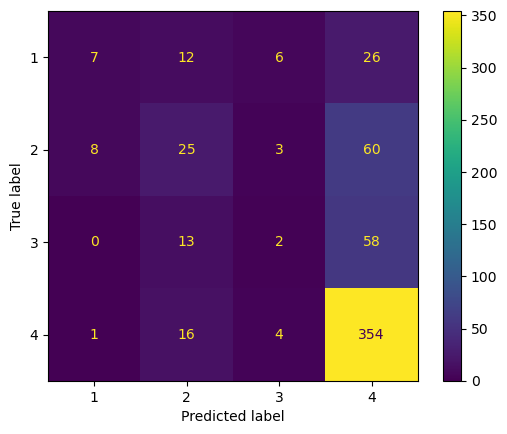

In [71]:

# test of defaults
clf = RandomForestClassifier(random_state= SEED)
clf.fit(X, y)

y_pred = clf.predict(X_valid)
evaluate_classification(y_pred, y_valid, cm=True)

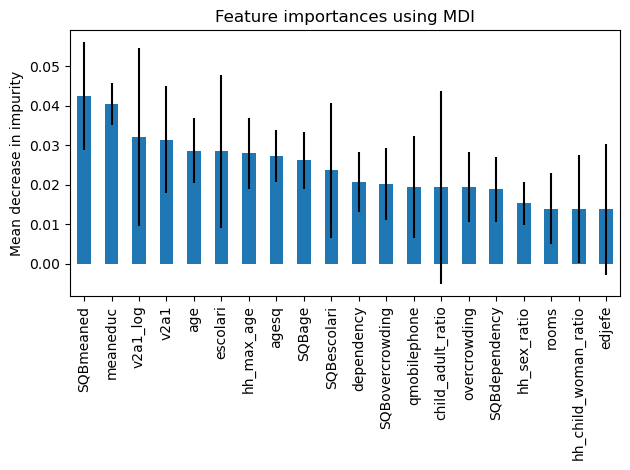

In [72]:
# Make graph of feature importance
# https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html
feature_names = X.columns.values.tolist()
importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_], axis=0)
forest_importances = pd.Series(importances, index=feature_names)

# top 20 features
top_20 = forest_importances.nlargest(20)
indices = np.where(np.in1d(forest_importances, top_20))[0]

fig, ax = plt.subplots()
#forest_importances.plot.bar(yerr=std, ax=ax)
top_20.plot.bar(yerr=std[indices], ax=ax)

ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [35]:
# Iterate over: 
    # number of trees: n_estimators
    #max_depth



In [73]:
# test number of trees in forest
#num_trees = [100, 200, 300, 400, 500, 1000, 1500, 2000]
num_trees = [i for i in range(100, 2100, 100)]
accuracy_lst = []
f1_lst = []
recall_lst = []

for i in num_trees:
    clf = RandomForestClassifier(n_estimators = i,
                                random_state = SEED)
    clf.fit(X, y)
    y_pred = clf.predict(X_valid)
    # print('number of trees =', i)
    # evaluate_classification(y_pred, y_valid)
    accuracy = accuracy_score(y_valid, y_pred)
    f1 = f1_score(y_valid, y_pred, average="weighted")
    recall = recall_score(y_valid, y_pred, average="weighted")
    
    accuracy_lst.append(accuracy)
    f1_lst.append(f1)
    recall_lst.append(recall)


In [69]:
print(accuracy_score(y_valid, y_pred))
print(f1_score(y_valid, y_pred, average="weighted"))
print(recall_score(y_valid, y_pred, average="weighted"))

0.6588235294117647
0.5862189343362669
0.6588235294117647


In [65]:
accuracy_lst == recall_lst

True

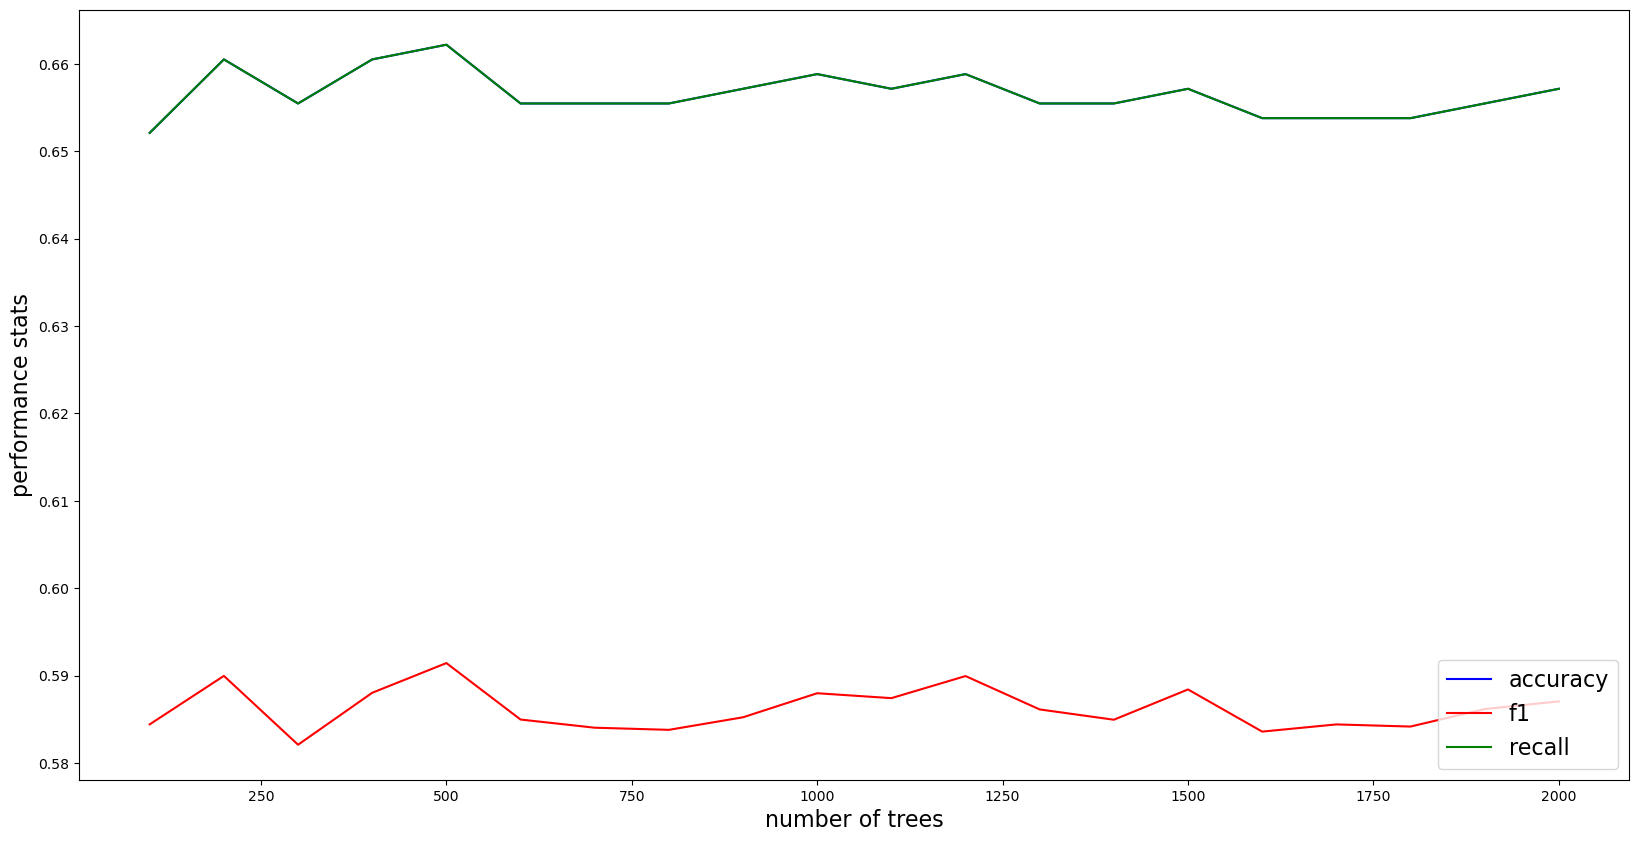

In [74]:
# plot the stats
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20,10))

plt.plot(num_trees, accuracy_lst, label = 'accuracy', color = 'blue')
plt.plot(num_trees, f1_lst, label = 'f1', color = 'red')
plt.plot(num_trees, recall_lst, label = 'recall', color = 'green')

ax.legend(loc="lower right", fontsize=16)
ax.set_xlabel("number of trees", fontsize=16)
ax.set_ylabel("performance stats", fontsize=16)
plt.show()


In [80]:
# Look via randomized search
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
               
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [83]:
clf = RandomForestClassifier(random_state= SEED)

rf_random = RandomizedSearchCV(estimator = clf, 
                                param_distributions = random_grid, 
                                n_iter = 100, 
                                cv = 3, 
                                verbose = 2,
                                 random_state= SEED, 
                                 n_jobs = -1)
# Fit the random search model
rf_random.fit(X, y)

rf_random.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   2.1s
[CV] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   2.5s
[CV] END bootstrap=True, max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=400; total time=   3.5s
[CV] END bootstrap=True, max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=400; total time=   3.5s
[CV] END bootstrap=True, max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=400; total time=   3.6s
[CV] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   2.3s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=

{'n_estimators': 800,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 30,
 'bootstrap': False}

Accuracy: 0.6521008403361345
F1 Score: 0.5859187626783028
Recall: 0.6521008403361345


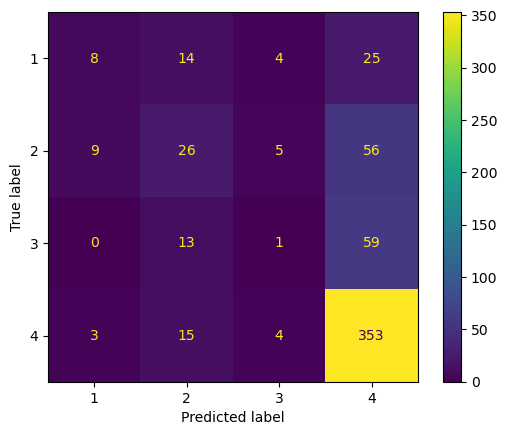

In [86]:
# Evaluate the best random model
best_random = rf_random.best_estimator_
best_random.fit(X, y)
y_pred = best_random.predict(X_valid)
evaluate_classification(y_pred, y_valid, cm = True)

## 4. Limitations and Next Steps